# Serbian Semantic Textual Similarity

In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [5]:
language = "Serbian"
data = pd.read_csv("train.csv", sep="\t")

train, test = train_test_split(data, test_size=0.2)


Let's see what are the rows in train and test datasets

In [6]:
train[:10]

,id,sentence_1,sentence_2,similarity
972,972,Neobična atmosfera na Glavnom odboru Demokrats...,Izbore treba raspisati tek kad dobijemo status...,0.0
911,911,"Portret generala Milana Nedića, predsednika vl...","Portret Milana Nedića, premijera Srbije u vrem...",3.2
576,576,Na širem području Srbije u toku je akcija u ko...,U više gradova u toku je akcija u kojoj je do ...,3.0
621,621,Potpredsednik Nove Srbije (NS) Jovan Marić izj...,Nova Srbija (NS) pozdravila je dolazak američk...,2.6
618,618,Posle rušenja kuće u Vojvođanskoj ulici i dva ...,Romi kojima su prekjuče porušene kuće u Vojvođ...,3.6
1090,1090,Novopazarska bolnica ostala je bez gasa jer je...,U toku prošle noći novopazarska bolnica ostala...,3.4
825,825,Holding Ist point u suvlasništvu srpskog bizni...,Holding Ist point u suvlasništvu srpskog bizni...,5.0
737,737,Specijalni izaslanik SAD za Pakistan i Avganis...,Američki specijalni predstavnik za Avganistan ...,3.0
294,294,"Predsednici Turske Abdulah Gul, Srbije Boris T...","Predsednik Srbije Boris Tadić, predsedavajući ...",2.2
221,221,"Palma, gradonačelnik Jagodine, pozvao je juče ...",Gradonačelnik Jagodine Dragan Marković najavio...,3.4


In [7]:
train.describe()

,id,similarity
count,953.000000,953.000000
mean,588.455404,2.523190
std,344.388690,1.267092
min,0.000000,0.000000
25%,295.000000,1.600000
50%,583.000000,3.000000
75%,886.000000,3.400000
max,1191.000000,5.000000


In [8]:
test[:10]

,id,sentence_1,sentence_2,similarity
250,250,"Čak trojica ministara Vlade Srbije, Mlađan Din...","Ovaj zaključak se nameće, posle jučerašnje pos...",1.8
282,282,Pred Sudom u Bariju danas je počelo preliminar...,Ročište na kojem je sud u Bariju trebalo da od...,1.2
900,900,Srpska napredna stranka zakazala je miting koj...,Zamenik predsednika SNS Aleksandar Vučić najav...,3.2
32,32,Vlada Srbije preporučila je Republičkom zavodu...,Vlada Srbije donela je odluku da se obustavi u...,2.6
458,458,Sazivanje sednice parlamenta o Kosovu zatražil...,Tri poslaničke grupe u Skupštini Srbije odvoje...,2.4
1068,1068,Profesor Fakulteta bezbednosti Zoran Dragišić ...,Profesor Fakulteta bezbednosti Zoran Dragišić:...,0.2
798,798,Carina na vozila iz EU snižena je 1. januara a...,Cene automobila u Srbiji nisu snižene iako je ...,2.2
863,863,Gas u Srbiji neće poskupeti do kraja grejne se...,Ministar energetike Petar Škundrić izjavio je ...,2.8
134,134,Oko makroekonomskih pitanja nema sporenja sa M...,O makroekonomskim pitanjima nema sporenja sa M...,5.0
782,782,Građani širom Srbije proslavili su doček Nove ...,Građani Srbije i njihovi gosti nastupanje 2011...,2.6


In [9]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

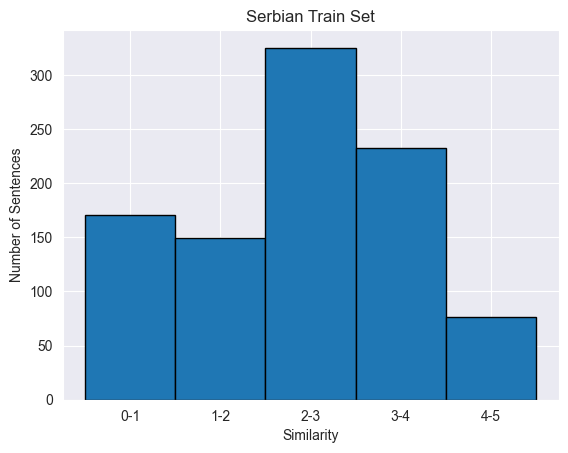

In [10]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

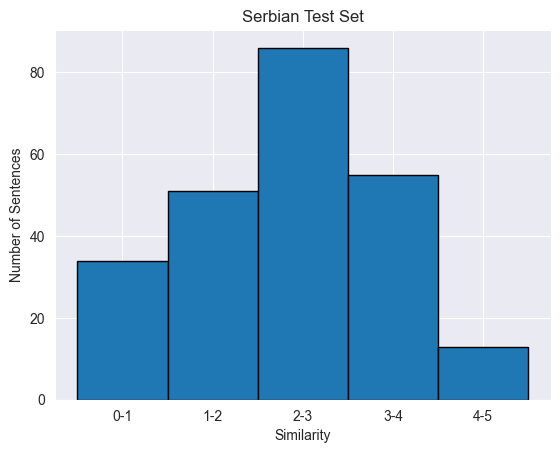

In [11]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [12]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [13]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

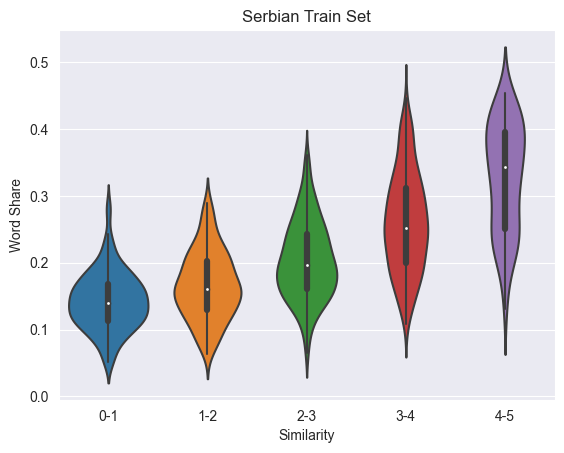

In [14]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

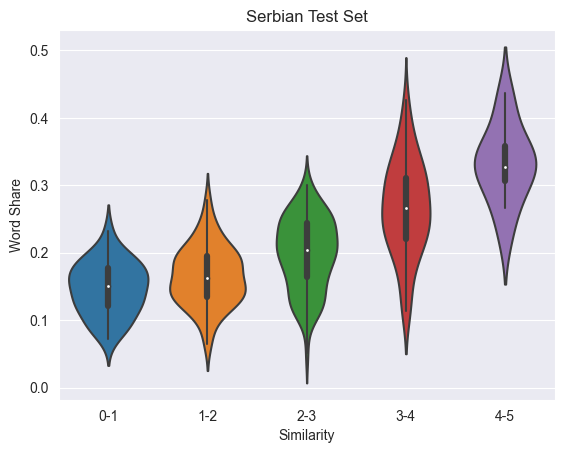

In [15]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [16]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
972,972,Neobična atmosfera na Glavnom odboru Demokrats...,Izbore treba raspisati tek kad dobijemo status...,0.0,0-1,1,1,187,175,27,26,8.0,51,0.156863,2,0
911,911,"Portret generala Milana Nedića, predsednika vl...","Portret Milana Nedića, premijera Srbije u vrem...",3.2,3-4,1,1,162,116,23,15,7.0,37,0.189189,2,0
576,576,Na širem području Srbije u toku je akcija u ko...,U više gradova u toku je akcija u kojoj je do ...,3.0,2-3,1,1,145,245,25,41,19.0,59,0.322034,2,0
621,621,Potpredsednik Nove Srbije (NS) Jovan Marić izj...,Nova Srbija (NS) pozdravila je dolazak američk...,2.6,2-3,1,1,235,199,36,34,11.0,66,0.166667,2,0
618,618,Posle rušenja kuće u Vojvođanskoj ulici i dva ...,Romi kojima su prekjuče porušene kuće u Vojvođ...,3.6,3-4,1,1,150,167,23,24,8.0,43,0.186047,2,0
1090,1090,Novopazarska bolnica ostala je bez gasa jer je...,U toku prošle noći novopazarska bolnica ostala...,3.4,3-4,1,1,197,195,29,29,13.0,53,0.245283,2,0
825,825,Holding Ist point u suvlasništvu srpskog bizni...,Holding Ist point u suvlasništvu srpskog bizni...,5.0,4-5,1,1,208,224,29,32,23.0,58,0.396552,2,0
737,737,Specijalni izaslanik SAD za Pakistan i Avganis...,Američki specijalni predstavnik za Avganistan ...,3.0,2-3,1,1,183,157,27,22,11.0,45,0.244444,2,0
294,294,"Predsednici Turske Abdulah Gul, Srbije Boris T...","Predsednik Srbije Boris Tadić, predsedavajući ...",2.2,2-3,1,1,179,238,25,32,12.0,51,0.235294,2,0
221,221,"Palma, gradonačelnik Jagodine, pozvao je juče ...",Gradonačelnik Jagodine Dragan Marković najavio...,3.4,3-4,1,1,142,149,24,27,9.0,47,0.191489,2,0


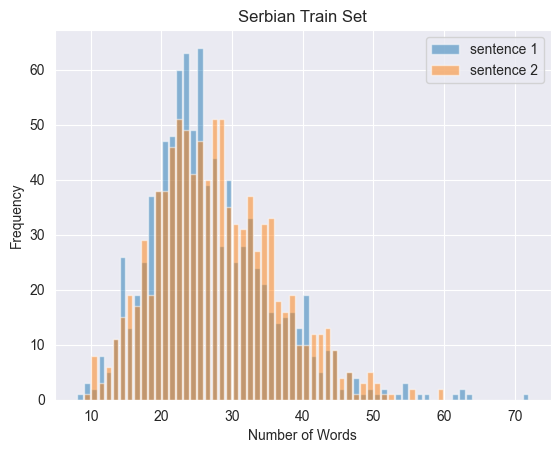

In [17]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

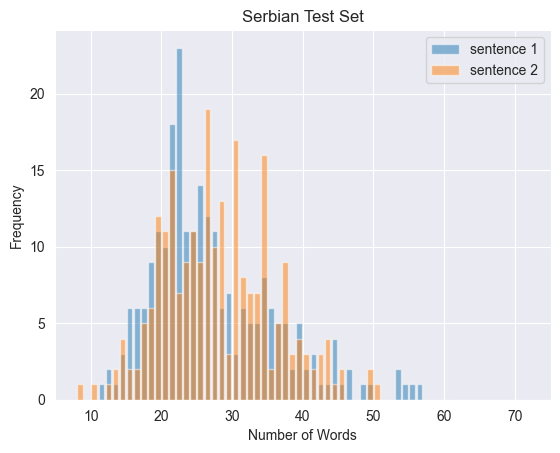

In [18]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [19]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,953.000000,953.000000,953.0,953.0,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.0,953.0
mean,588.455404,2.523190,1.0,1.0,175.580273,182.377754,26.347324,27.202518,10.334732,49.958027,0.210555,2.0,0.0
std,344.388690,1.267092,0.0,0.0,55.379232,55.535268,8.638518,8.383652,4.558930,12.712576,0.080936,0.0,0.0
min,0.000000,0.000000,1.0,1.0,58.000000,63.000000,8.000000,9.000000,2.000000,16.000000,0.051282,2.0,0.0
25%,295.000000,1.600000,1.0,1.0,139.000000,143.000000,21.000000,21.000000,7.000000,41.000000,0.151515,2.0,0.0
50%,583.000000,3.000000,1.0,1.0,160.000000,175.000000,25.000000,26.000000,9.000000,49.000000,0.195652,2.0,0.0
75%,886.000000,3.400000,1.0,1.0,208.000000,216.000000,31.000000,32.000000,12.000000,58.000000,0.258621,2.0,0.0
max,1191.000000,5.000000,1.0,1.0,432.000000,368.000000,71.000000,59.000000,42.000000,105.000000,0.454545,2.0,0.0


In [20]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,239.000000,239.000000,239.0,239.0,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.0,239.0
mean,623.589958,2.474477,1.0,1.0,177.962343,184.117155,26.644351,27.560669,10.334728,50.569038,0.206968,2.0,0.0
std,342.951744,1.180219,0.0,0.0,55.415113,52.016914,8.793325,7.838943,4.197449,12.171846,0.074097,0.0,0.0
min,8.000000,0.000000,1.0,1.0,73.000000,62.000000,11.000000,8.000000,3.000000,21.000000,0.050847,2.0,0.0
25%,310.500000,1.700000,1.0,1.0,142.000000,144.500000,21.000000,21.000000,7.000000,42.000000,0.150000,2.0,0.0
50%,654.000000,2.800000,1.0,1.0,160.000000,180.000000,25.000000,27.000000,10.000000,50.000000,0.200000,2.0,0.0
75%,909.500000,3.200000,1.0,1.0,209.000000,220.000000,32.000000,33.000000,13.000000,58.500000,0.250000,2.0,0.0
max,1188.000000,5.000000,1.0,1.0,371.000000,339.000000,56.000000,50.000000,24.000000,90.000000,0.436364,2.0,0.0
